# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {답변입력}

High variance는 모델이 학습 데이터에 대해 과도하게 학습되어, 즉 너무 특정 학습 데이터의 세부 사항에 맞춰져 있어서 새로운 데이터나 테스트 데이터에 대해 일반화하는 데 실패하는 상태를 의미함. 이런 현상을 "과적합(overfitting)"이라고도 하는데, 과적합된 모델은 학습 데이터의 노이즈나 불필요한 세부 정보까지 학습하여, 이를 일반적인 패턴으로 오인하게 되어 성능저하가 발생함

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ {답변입력}
High bias는 모델이 너무 단순하여 학습 데이터의 중요한 패턴과 구조를 충분히 학습하지 못하는 상태를 의미함. 이런 상태를 "과소적합(underfitting)"이라고 하는데, 과소적합된 모델은 실제 데이터에 존재하는 관계를 모델링하기에는 너무 간단하여, 학습 데이터와 테스트 데이터 모두에서 성능이 좋지 않음

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ {답변입력}

적합한 Ensemble 방식: Bagging (Bootstrap Aggregating), 예시로 Random Forest

이유 : Bagging 방식은 복원추출하면서 다양한 sample들을 형성하여 각각 개별로 Modeling하고, 이를 앙상블하여 과적합 방지를 할 수 있음

- High bias problem : 🐻‍❄️ {답변입력}

적합한 Ensemble 방식: Boosting, 예시로 AdaBoost, Gradient Boosting
이유: Boosting은 여러 약한 학습기(weak learners)를 순차적으로 훈련시키면서, 이전 학습기가 잘못 예측한 샘플에 더 많은 가중치를 부여하고 이 과정을 반복하게 되어 오버피팅을 유도함

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('/content/drive/MyDrive/tobigs22/정규세션/3주차/Ensemble/BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

In [5]:
# 데이터의 처음 몇 행과 기본 정보 확인
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

(   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
 0  768805383  Existing Customer            45      M                3   
 1  818770008  Existing Customer            49      F                5   
 2  713982108  Existing Customer            51      M                3   
 3  769911858  Existing Customer            40      F                4   
 4  709106358  Existing Customer            40      M                3   
 
   Education_Level Marital_Status Income_Category Card_Category  \
 0     High School        Married     $60K - $80K          Blue   
 1        Graduate         Single  Less than $40K          Blue   
 2        Graduate        Married    $80K - $120K          Blue   
 3     High School        Unknown  Less than $40K          Blue   
 4      Uneducated        Married     $60K - $80K          Blue   
 
    Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
 0              39  ...                       1                      3   
 1

In [14]:
from sklearn.preprocessing import LabelEncoder

# 범주형 변수 인코딩
categorical_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# 불필요한 열 제거
cols_to_drop = ['CLIENTNUM']
bank_data = df.drop(columns=cols_to_drop)

# 데이터의 처음 몇 행 확인
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


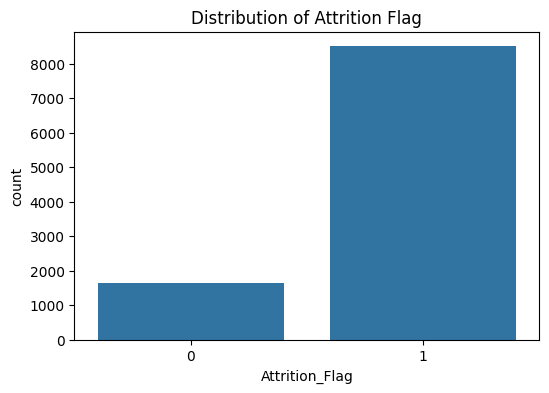

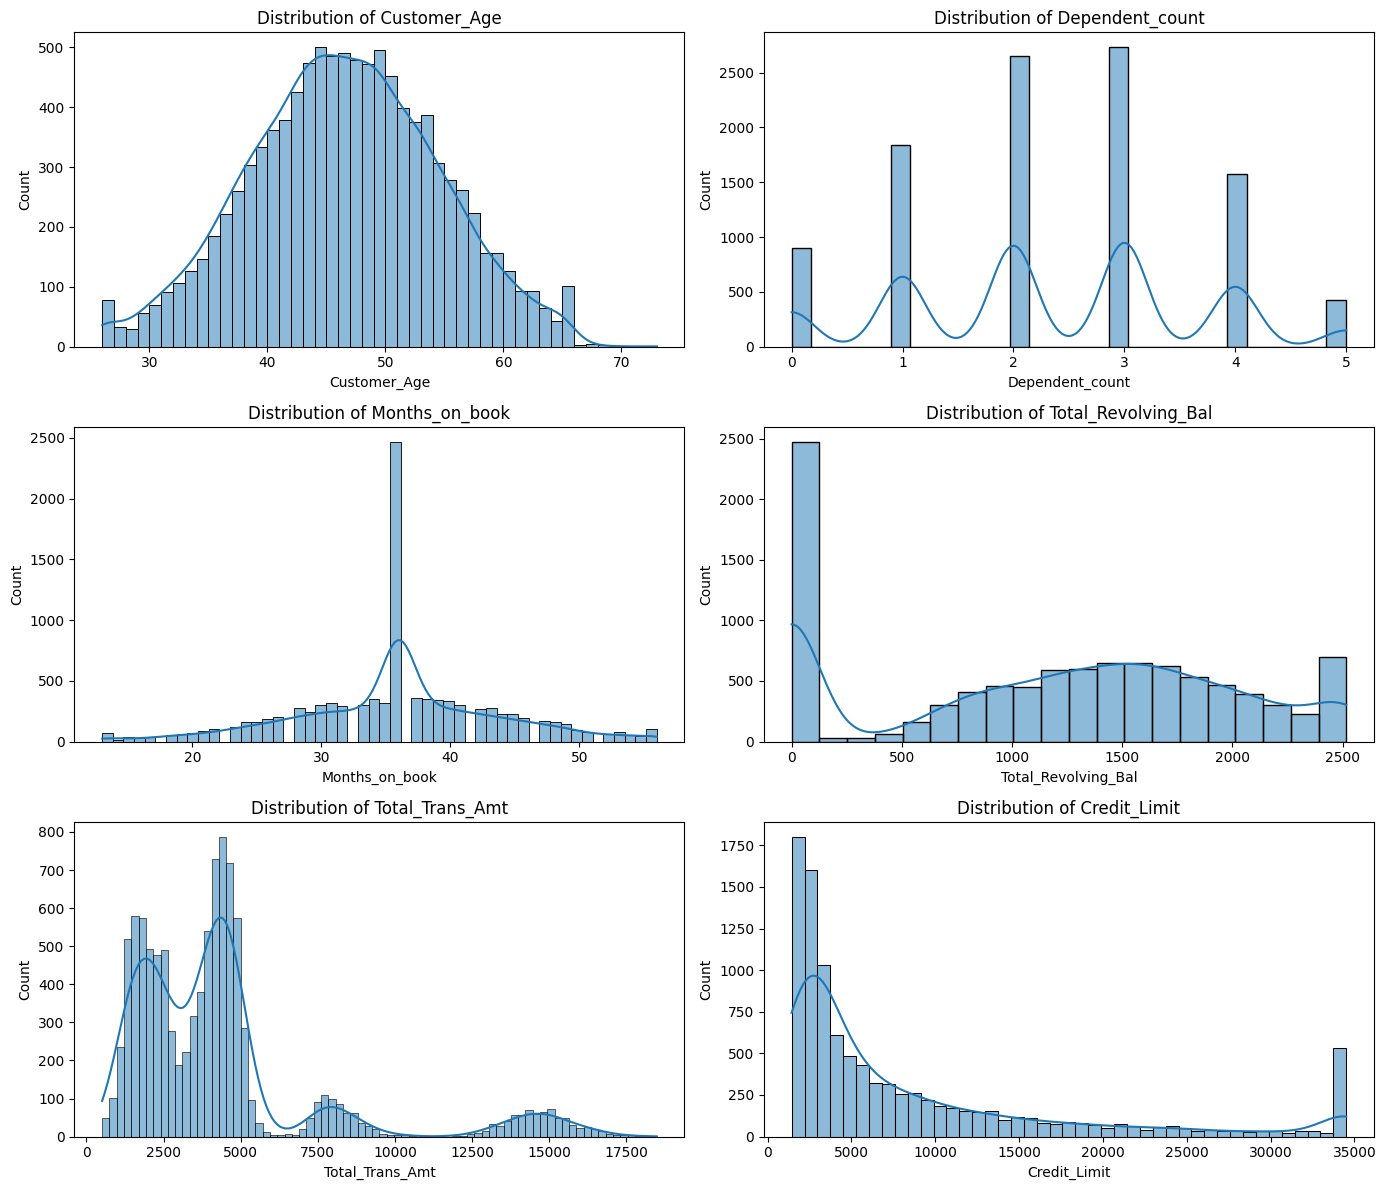

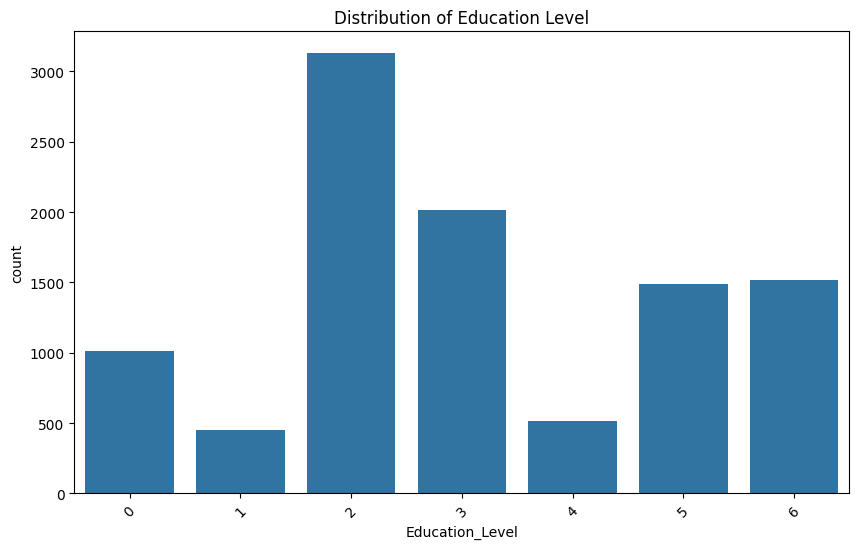

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타겟 변수의 분포
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distribution of Attrition Flag')
plt.show()

# 수치형 변수의 분포 확인
fig, ax = plt.subplots(3, 2, figsize=(14, 12))
num_vars = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Credit_Limit']
for i, var in enumerate(num_vars):
    sns.histplot(df[var], kde=True, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

# 범주형 변수의 분포 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='Education_Level', data=df)
plt.title('Distribution of Education Level')
plt.xticks(rotation=45)
plt.show()

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# 특성과 타겟 분리
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 모델 초기화 및 학습
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 결과 저장을 위한 딕셔너리
results = {}

# 각 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1 Score": report['weighted avg']['f1-score']
    }

# 결과 출력
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.937315,0.937720,0.937315,0.937508
Random Forest,0.961994,0.961277,0.961994,0.961320
AdaBoost,0.961007,0.960703,0.961007,0.960835
Gradient Boosting,0.963968,0.963325,0.963968,0.963329
